In [2]:
#Exploring regression fit

using Flux
using LinearAlgebra
using Random

Random.seed!(0)

function regression_fit(X, Y, l, r, lambda; numiters = 500)
    #     Inputs:
    #         X: input data
    #         Y: output data
    #         l: l(yhat, y)
    #         r: r(theta)
    #         lambda: regularization hyper-parameter
    #         numiters (optional): number of iterations
    data = zip(eachrow(X), eachrow(Y))
    n,d = size(X)
    theta = zeros(d)
    predicty(x) = theta'*x
    loss(x, y) = l(predicty(x), y[1]) + lambda*r(theta)
    cost(x,y) = loss(x,y) + lambda*r(theta)
    risk() = sum((cost(d...) for d in data))/n
    opt = Flux.ADAGrad()
    losses = []
    tracker() = push!(losses, risk())
    Flux.@epochs numiters Flux.train!(loss, Flux.params(theta), data, opt, cb = Flux.throttle(tracker,10))
    return theta
end

regression_fit (generic function with 1 method)

In [3]:
include("readclassjson.jl")
data = readclassjson("residual_props.json")

U_train = data["U_train"]
U_test = data["U_test"]
v_train = data["v_train"]
v_test = data["v_test"]

500-element Vector{Float64}:
  -4.438501889126882
   0.5594506309529232
   2.0750545601532058
   1.4400431923248298
  -1.6599033383620996
  -0.09953618412070572
  -4.437996001869989
  -0.36132651741755767
  -2.0554077944019444
 -15.978746279610993
 -10.350382192031846
  -3.643679606107295
   2.443206412014094
   ⋮
  -4.131818209155858
   4.138159119174317
   3.0458703227739257
   0.679054335238295
  -0.659021932592424
  -0.3039236377871142
  -4.083795389876711
 -14.660273095232764
  -4.450686647657978
  -0.5712073476024715
   0.19318955249619219
   1.8144926986316525

In [4]:
r(theta) = 0
lambda = 1

X_train = hcat(ones(size(v_test, 1)), U_train)
X_test = hcat(ones(size(v_test, 1)), U_test)

function rms(y, yhat)
    return sqrt(sum((yhat .- y).^2) / size(y, 1))
end

function p(u, tau)
    if u < 0 
        return -tau*u
    else
        return (1-tau)*u
    end
end

l_15(y_hat, y) = p(y_hat - y, 0.15)
l_5(y_hat, y) = p(y_hat - y, 0.5)
l_85(y_hat, y) = p(y_hat - y, 0.85)

theta_15 = regression_fit(X_train, v_train, l_15, r, lambda)
train_rms_15 = rms(v_train, X_train*theta_15)
test_rms_15 = rms(v_test, X_test*theta_15)

theta_5 = regression_fit(X_train, v_train, l_5, r, lambda)
train_rms_5 = rms(v_train, X_train*theta_5)
test_rms_5 = rms(v_test, X_test*theta_5)

theta_85 = regression_fit(X_train, v_train, l_85, r, lambda)
train_rms_85 = rms(v_train, X_train*theta_85)
test_rms_85 = rms(v_test, X_test*theta_85)

┌ Info: Epoch 1
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 2
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 3
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 4
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 5
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 6
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 7
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 8
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 9
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 10
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 11
└ @ Main C:\Users\surface\.julia

┌ Info: Epoch 104
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 105
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 106
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 107
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 108
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 109
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 110
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 111
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 112
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 113
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 114
└ @ Main C:\

┌ Info: Epoch 206
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 207
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 208
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 209
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 210
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 211
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 212
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 213
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 214
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 215
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 216
└ @ Main C:\

┌ Info: Epoch 308
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 309
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 310
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 311
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 312
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 313
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 314
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 315
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 316
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 317
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 318
└ @ Main C:\

┌ Info: Epoch 410
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 411
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 412
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 413
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 414
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 415
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 416
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 417
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 418
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 419
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 420
└ @ Main C:\

┌ Info: Epoch 12
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 13
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 14
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 15
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 16
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 17
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 18
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 19
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 20
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 21
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 22
└ @ Main C:\Users\surfa

┌ Info: Epoch 115
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 116
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 117
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 118
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 119
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 120
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 121
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 122
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 123
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 124
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 125
└ @ Main C:\

┌ Info: Epoch 217
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 218
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 219
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 220
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 221
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 222
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 223
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 224
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 225
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 226
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 227
└ @ Main C:\

┌ Info: Epoch 319
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 320
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 321
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 322
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 323
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 324
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 325
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 326
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 327
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 328
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 329
└ @ Main C:\

┌ Info: Epoch 421
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 422
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 423
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 424
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 425
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 426
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 427
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 428
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 429
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 430
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 431
└ @ Main C:\

┌ Info: Epoch 23
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 24
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 25
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 26
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 27
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 28
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 29
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 30
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 31
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 32
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 33
└ @ Main C:\Users\surfa

┌ Info: Epoch 126
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 127
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 128
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 129
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 130
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 131
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 132
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 133
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 134
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 135
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 136
└ @ Main C:\

┌ Info: Epoch 228
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 229
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 230
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 231
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 232
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 233
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 234
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 235
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 236
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 237
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 238
└ @ Main C:\

┌ Info: Epoch 330
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 331
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 332
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 333
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 334
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 335
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 336
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 337
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 338
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 339
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 340
└ @ Main C:\

┌ Info: Epoch 432
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 433
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 434
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 435
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 436
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 437
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 438
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 439
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 440
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 441
└ @ Main C:\Users\surface\.julia\packages\Flux\18YZE\src\optimise\train.jl:153
┌ Info: Epoch 442
└ @ Main C:\

3.5296290921386553

In [5]:
println(train_rms_15)
println(train_rms_5)
println(train_rms_85)

println(test_rms_15)
println(test_rms_5)
println(test_rms_85)

3.6062392338544216
2.9492681552857403
3.305452028782174
3.7623581459779722
3.1905644073979347
3.5296290921386553


0.146

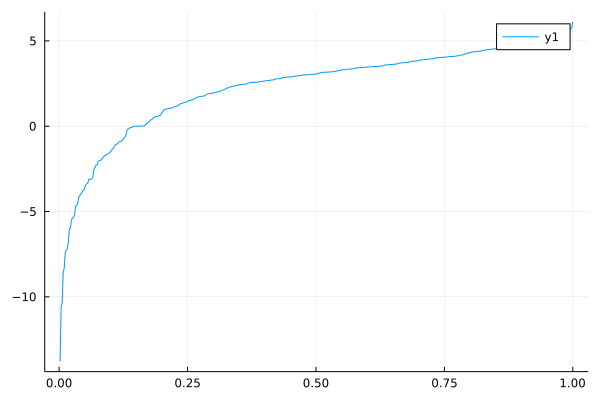

In [22]:
using Plots
d = size(v_train, 1)

train_r_15 = v_train - X_train*theta_15
train_percent_15 = count(i->(i<0), train_r_15)/d
print(train_percent_15)
plot(collect(1:d)/d, sort(train_r_15))

0.502

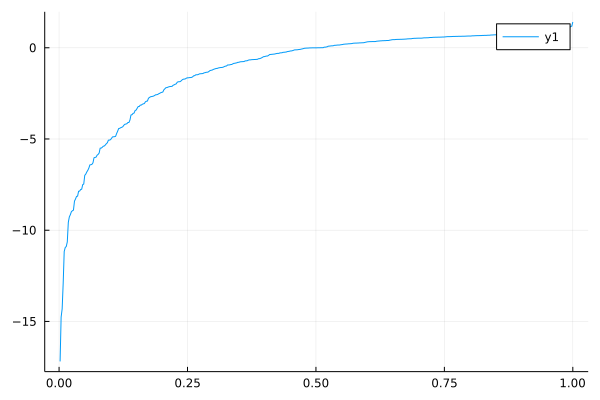

In [23]:
train_r_5 = v_train - X_train*theta_5
train_percent_5 = count(i->(i<0), train_r_5) / d
print(train_percent_5)
plot(collect(1:d)/d, sort(train_r_5))

0.86

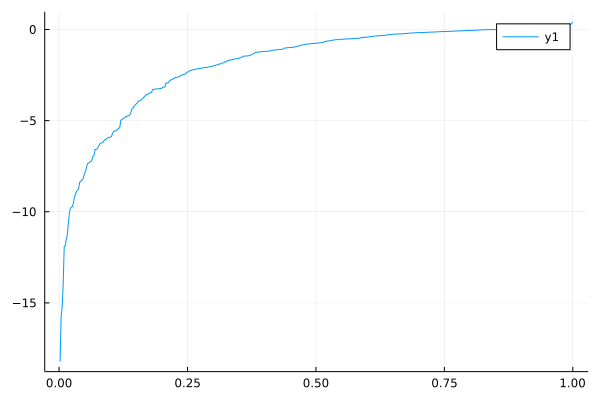

In [24]:
train_r_85 = v_train - X_train*theta_85
train_percent_85 = count(i->(i<0), train_r_85) / d
print(train_percent_85)
plot(collect(1:d)/d, sort(train_r_85))

0.148

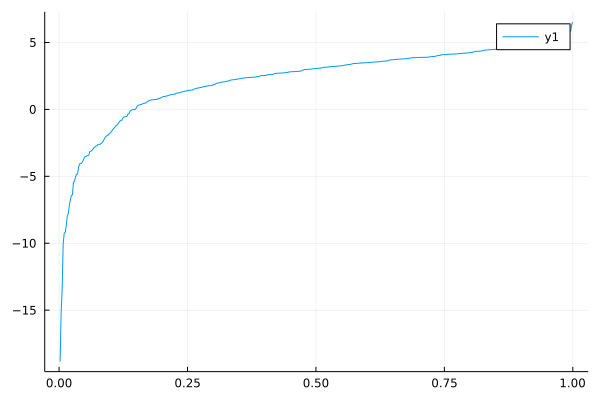

In [25]:
test_r_15 = v_test - X_test*theta_15
test_percent_15 = count(i->(i<0), test_r_15) / d
print(test_percent_15)
plot(collect(1:d)/d, sort(test_r_15))

0.528

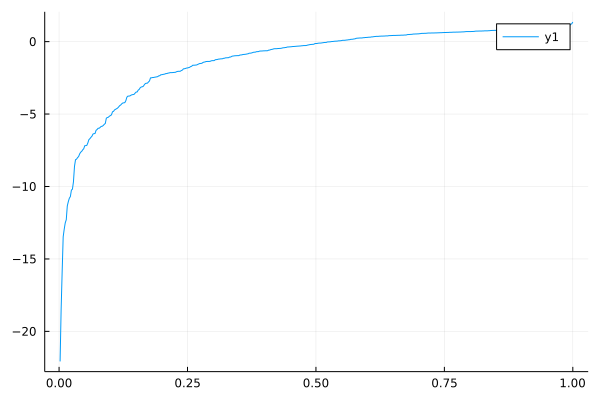

In [26]:
test_r_5 = v_test - X_test*theta_5
test_percent_5 = count(i->(i<0), test_r_5) / d
print(test_percent_5)
plot(collect(1:d)/d, sort(test_r_5))

0.818

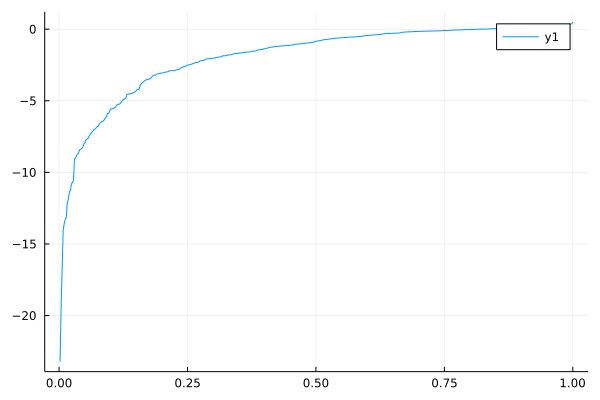

In [27]:
test_r_85 = v_test - X_test*theta_85
test_percent_85 = count(i->(i<0), test_r_85) / d
print(test_percent_85)
plot(collect(1:d)/d, sort(test_r_85))